<h1 style="padding:20px;background-color:white;margin:0;color:red;font-family:Georgia;font-size:300%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">🩺🦠🍔 BMI and Health Risk Assessment💊🧬💉</h1>

<h1 style="padding:20px;background-color:black;margin:0;color:white;font-family:Georgia;font-size:200%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:300">The Body mass index(BMI) is defined as the body mass divided by the square of the body height, and is expressed in units of kg/m², resulting from mass in kilograms and height in metres.</h1>



<img src="https://b2848764.smushcdn.com/2848764/wp-content/uploads/2023/02/Understanding-Your-BMI-A-Guide-to-Reading-a-BMI-Chart.jpg?lossy=1&strip=1&webp=1"
     width="1300"
     height="700"
     width= 200%
     style="display: block; margin: 0 auto;" />

<h1 style="padding:1px;background-color:#ffa068fc;margin:0;color:black;font-family:Georgia;font-size:300%;text-align:center;border-radius: 1px ;overflow:hidden;font-weight:100">📚CONTENT📖</h1>

# BMI introduction

BMI is a measurement of a person's leanness or corpulence based on their height and weight, and is intended to quantify tissue mass. It is widely used as a general indicator of whether a person has a healthy body weight for their height. 
These ranges of BMI vary based on factors such as region and age, and are sometimes further divided into subcategories such as severely underweight or very severely obese. Being overweight or underweight can have significant health effects, so while BMI is an imperfect measure of healthy body weight, it is a useful indicator of whether any additional testing or action is required. 

* **Refer to the table below to see the different categories based on BMI that are used by the calculator.**

# BMI table for adults

* ***Classification	BMI range - kg/m2***

* **Severe Thinness 	< 16** 
* **Moderate Thinness	16 - 17**
* **Mild Thinness	17 - 18.5**
* **Normal	18.5 - 25**
* **Overweight	25 - 30**
* **Obese Class I	30 - 35**
* **Obese Class II	35 - 40**
* **Obese Class III	> 40**

# BMI table for children and teens, age 2-20

* **Category	Percentile Range**
* **Underweight	<5%**
* **Healthy weight	5% - 85%**
* **At risk of overweight	85% - 95%**
* **Overweight	>95%**


# Risks associated with being overweight

      Being overweight increases the risk of a number of serious diseases and health conditions. Below is a list of risks involving overweight patients

* **High blood pressure**

* **Higher levels of LDL cholesterol, which is widely considered "bad cholesterol," lower levels of HDL cholesterol, considered to be good cholesterol in moderation, and high levels of triglycerides**

* **Type II diabetes**

* **Coronary heart disease**

* **Stroke**

* **Gallbladder disease**

* **Osteoarthritis, a type of joint disease caused by breakdown of joint cartilage**

* **Sleep apnea and breathing problems**

* **Certain cancers (endometrial, breast, colon, kidney, gallbladder, liver)**

* **Low quality of life**

* **Mental illnesses such as clinical depression, anxiety, and others**

* **Body pains and difficulty with certain physical functions**

* **Generally, an increased risk of mortality compared to those with a healthy BMI**

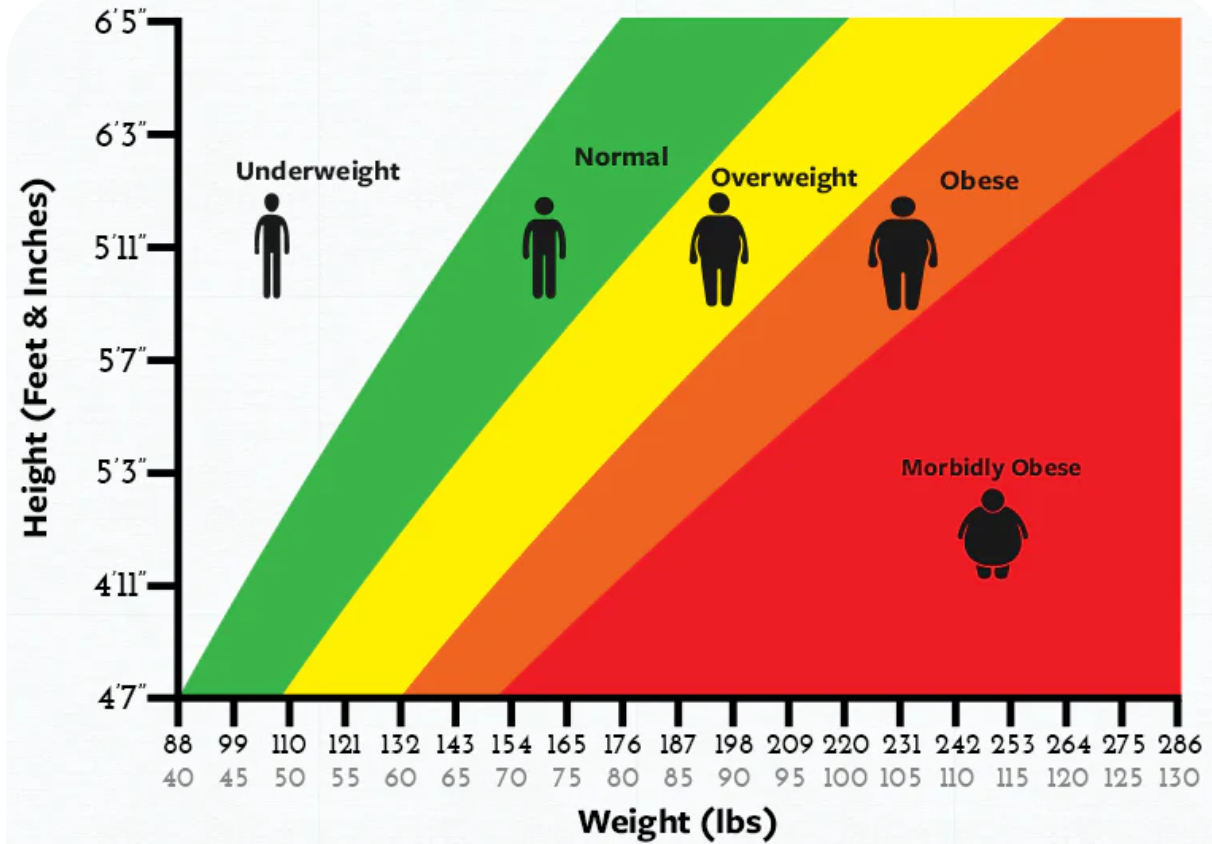

# BMI formula

Below are the equations used for calculating BMI in the (SI) and the US customary system (USC) using a 5'8", 160-pound individual as an example:

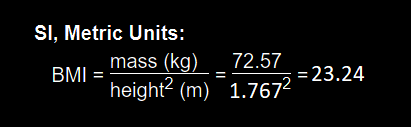

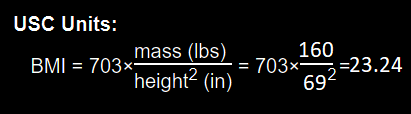

# BMI Prime

BMI prime is the ratio of a person's measured BMI to the upper limit of BMI that is considered "normal," by institutions such as the WHO and the CDC. Though it may differ in some countries, such as those in Asia, this upper limit, which will be referred to as BMI upper is 27 kg/m2.

The BMI prime formula is:

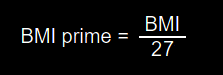 


<h1 style="padding:20px;background-color:000;margin:0;color:white;font-family:Georgia;font-size:200%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:300">Liberaries</h1>


In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

#  Dataset Structure

* **Person ID (Integer):** Unique identifier for each individual.
* **Gender (String):** Male, Female, Other.
* **Age (Integer):** The age of the individual.
* **Occupation (String):** Job title or category.
* **Sleep Duration (Numeric):** Average hours of sleep per night.
* **Quality of Sleep (Integer):** 1-10 scale rating sleep quality.
* **Physical Activity Level (Integer):** 1-10 scale, representing sedentary to highly active.
* **Stress Level (Integer):** 1-10 scale, representing low to high stress.
* **BMI Category (String):** Classification based on BMI range (e.g., Severe Thinness, Normal, Obese Class I).
* **Blood Pressure (Integer):** Measured in mmHg.
* **Heart Rate (Integer):** Measured in beats per minute.
* **Daily Steps (Integer):** Average number of steps taken daily.
* **Sleep Disorder (String):** None, Sleep Apnea, or Other (with details).

In [144]:
# Loading the data

df = pd.read_csv('/kaggle/input/sleep-health-and-lifestyle-dataset/Sleep_health_and_lifestyle_dataset.csv')

# Checking the data
df.head()


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [145]:
# Preprocessing

# Checking the missing values
df.isnull().sum()

# Separating numeric and categorical columns
numeric_columns = df.select_dtypes(include=[np.number]).columns
categorical_columns = df.select_dtypes(include=[object]).columns

# Filling missing values in numeric with the mean
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Fill missing values in categorical with the mode
df[categorical_columns] = df[categorical_columns].apply(lambda col: col.fillna(col.mode()[0]))

In [146]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,Sleep Apnea
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Sleep Apnea
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Sleep Apnea
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [147]:
# Verifying that there are no more missing values
df.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

* **We Don't have Weight & Height Column in the dataset which is nessesory for BMI Calculation so lets add Weight & Height Column to get the result**

In [148]:
# Generating Height (in cm) and Weight (in kg) columns
np.random.seed(42)  
df['Height'] = np.random.normal(170, 10, df.shape[0])  # Average height 170 cm, std 10 cm
df['Weight'] = np.random.normal(70, 15, df.shape[0])   # Average weight 70 kg, std 15 kg

In [149]:
label_to_encode = LabelEncoder()
df['Gender'] = label_to_encode.fit_transform(df['Gender'])
df['Occupation'] = label_to_encode.fit_transform(df['Occupation'])
df['Sleep Disorder'] = label_to_encode.fit_transform(df['Sleep Disorder'])

# BMI formula

Below are the equations used for calculating BMI in the (SI) and the US customary system (USC) using a 5'8", 160-pound individual as an example:

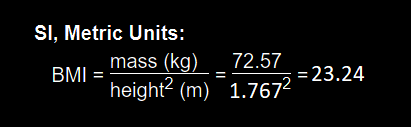

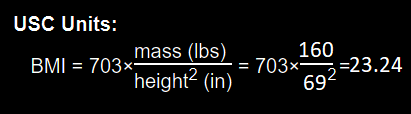

In [150]:
# Lets Calculate BMI and BMI Prime
df['BMI'] = df['Weight'] / (df['Height'] ** 2) * 10000  # Converting height from cm to meters squared
df['BMI Prime'] = df['BMI'] / 25

In [151]:
# The Easy Part 😋😋 "Feature Engineering - BMI Classification "
def bmi_class(bmi):
    if bmi < 16:
        return 'Severe Thinness'
    elif 16 <= bmi < 17:
        return 'Moderate Thinness'
    elif 17 <= bmi < 18.5:
        return 'Mild Thinness'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Overweight'
    elif 30 <= bmi < 35:
        return 'Obese Class I'
    elif 35 <= bmi < 40:
        return 'Obese Class II'
    else:
        return 'Obese Class III'

df['BMI Category'] = df['BMI'].apply(bmi_class)

<h1 style="padding:20px;background-color:000;margin:0;color:white;font-family:Georgia;font-size:200%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:300">Exploratory Data Analysis (EDA)</h1>

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


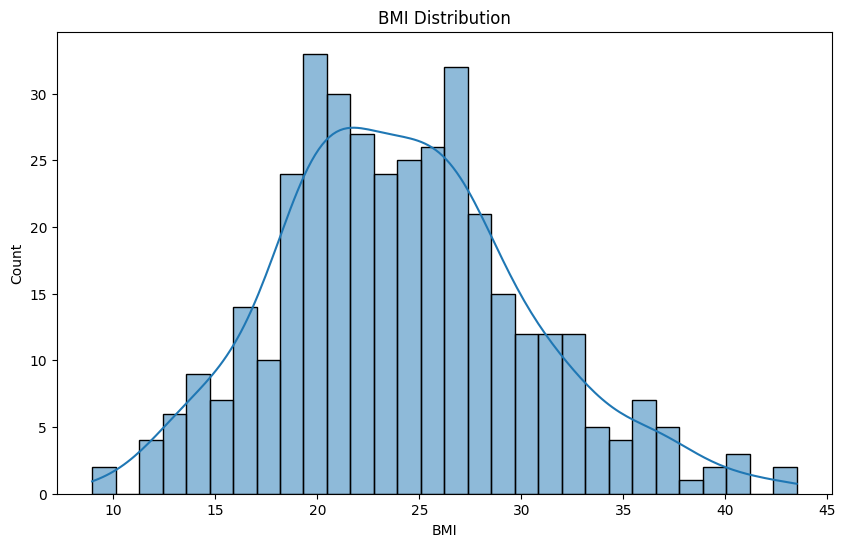

In [152]:
plt.figure(figsize=(10,6))
sns.histplot(df['BMI'], kde=True, bins=30)
plt.title('BMI Distribution')
plt.show()

In [153]:
# Lets Split 🩸🩸'Blood Pressure' into 'Systolic' and 'Diastolic'
df[['Systolic_BP', 'Diastolic_BP']] = df['Blood Pressure'].str.split('/', expand=True)

# Convert these columns to numeric
df['Systolic_BP'] = pd.to_numeric(df['Systolic_BP'], errors='coerce')
df['Diastolic_BP'] = pd.to_numeric(df['Diastolic_BP'], errors='coerce')

label_encoder = LabelEncoder()

# Lets Encode other non-numeric columns
df_encoded = df.copy()
df_encoded['BMI Category'] = label_encoder.fit_transform(df['BMI Category'])
df_encoded['Sleep Disorder'] = label_encoder.fit_transform(df['Sleep Disorder'])

# Remove the original 🩸🩸'Blood Pressure' column since we've split it
df_encoded = df_encoded.drop(columns=['Blood Pressure'])

# Now let's check and handle any remaining non-numeric columns
numeric_df = df_encoded.select_dtypes(include=[np.number])


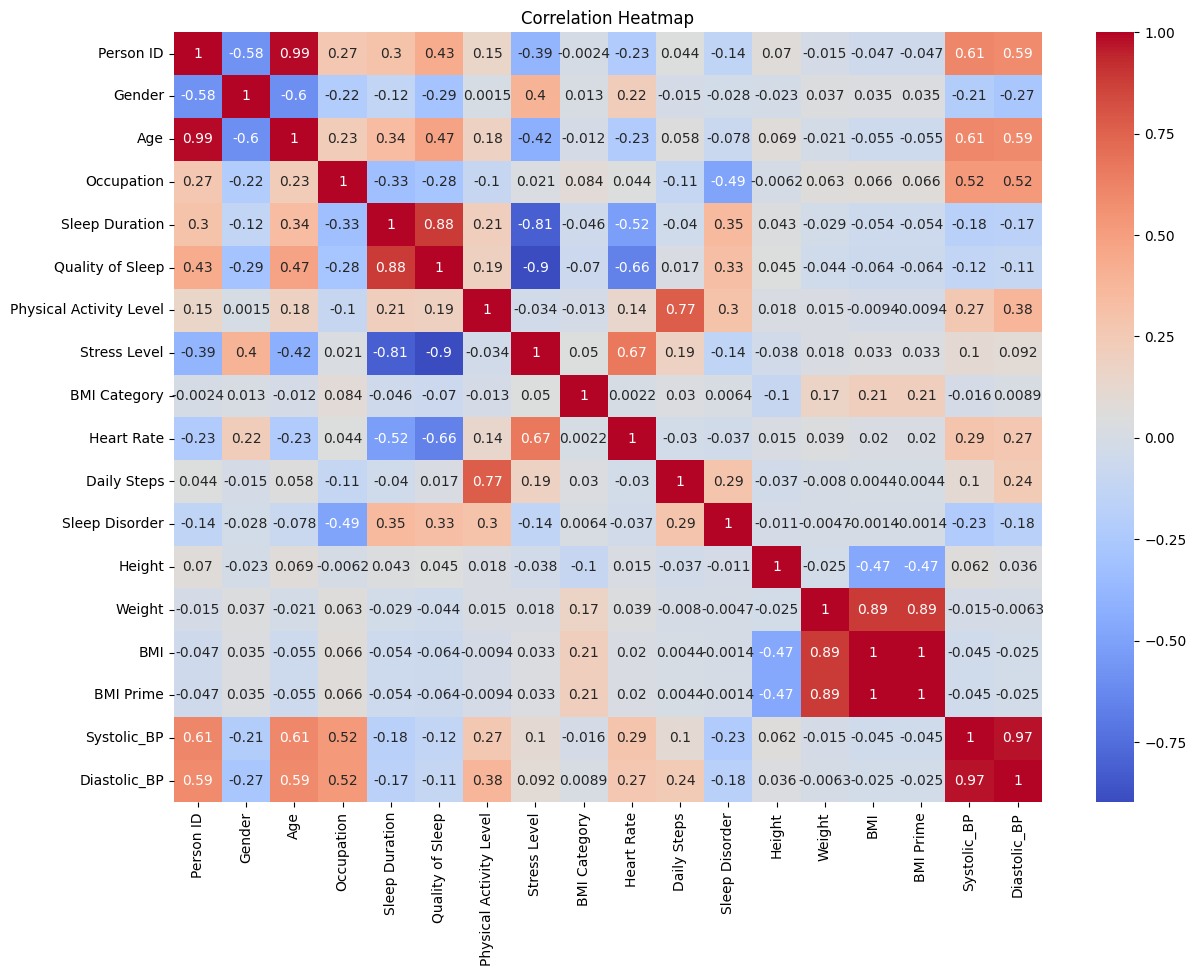

In [154]:
# Now After all this 😶😶 lets generate the correlation matrix with the numeric data
plt.figure(figsize=(14,10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


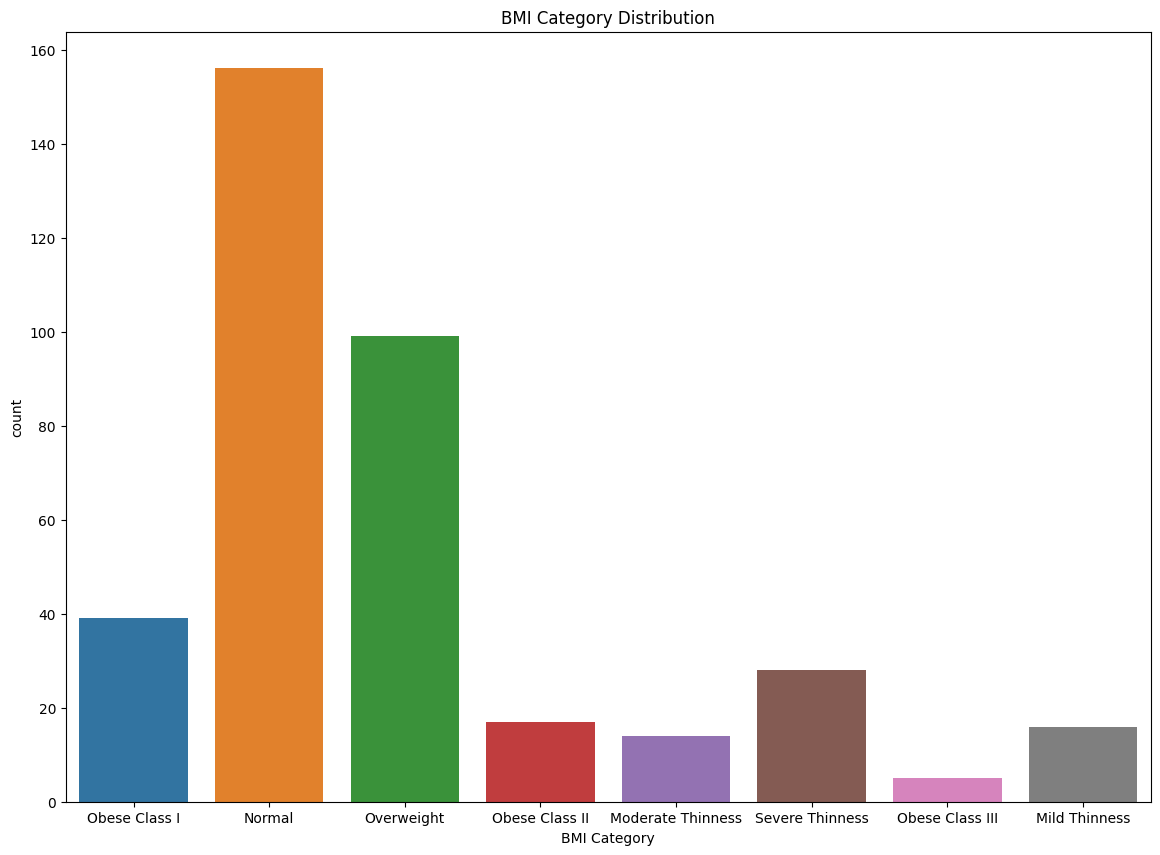

In [155]:
plt.figure(figsize=(14,10))
sns.countplot(x='BMI Category', data=df)
plt.title('BMI Category Distribution')
plt.show()

* **Health Risk**

In [156]:
# Lets classify health risk
def classify_health_risk(row):
    if row['Stress Level'] >= 4 or row['Quality of Sleep'] <= 3 or row['BMI Category'] == 'Obese':
        return 'High Risk'
    elif row['Stress Level'] == 3 or row['Quality of Sleep'] == 4 or row['BMI Category'] == 'Overweight':
        return 'Moderate Risk'
    else:
        return 'Low Risk'

In [157]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Height,Weight,BMI,BMI Prime,Systolic_BP,Diastolic_BP
0,1,1,27,9,6.1,6,42,6,Obese Class I,126/83,77,4200,1,174.967142,102.297737,33.415890,1.336636,126,83
1,2,1,28,1,6.2,6,60,8,Normal,125/80,75,10000,1,168.617357,58.489787,20.571951,0.822878,125,80
2,3,1,28,1,6.2,6,60,8,Overweight,125/80,75,10000,1,176.476885,83.084810,26.677552,1.067102,125,80
3,4,1,28,6,5.9,4,30,8,Normal,140/90,85,3000,1,185.230299,72.750130,21.203606,0.848144,140,90
4,5,1,28,6,5.9,4,30,8,Obese Class II,140/90,85,3000,1,167.658466,102.847044,36.588182,1.463527,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,0,59,5,8.1,9,75,3,Overweight,140/95,68,7000,1,162.269902,70.391366,26.732738,1.069310,140,95
370,371,0,59,5,8.0,9,75,3,Overweight,140/95,68,7000,1,170.245102,77.764885,26.830841,1.073234,140,95
371,372,0,59,5,8.1,9,75,3,Normal,140/95,68,7000,1,174.979983,59.113843,19.306896,0.772276,140,95
372,373,0,59,5,8.1,9,75,3,Normal,140/95,68,7000,1,184.511436,72.801501,21.384237,0.855369,140,95


In [158]:
# Applying the function to each row and create a new column
df['Health Risk'] = df.apply(classify_health_risk, axis=1)

In [159]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Height,Weight,BMI,BMI Prime,Systolic_BP,Diastolic_BP,Health Risk
0,1,1,27,9,6.1,6,42,6,Obese Class I,126/83,77,4200,1,174.967142,102.297737,33.415890,1.336636,126,83,High Risk
1,2,1,28,1,6.2,6,60,8,Normal,125/80,75,10000,1,168.617357,58.489787,20.571951,0.822878,125,80,High Risk
2,3,1,28,1,6.2,6,60,8,Overweight,125/80,75,10000,1,176.476885,83.084810,26.677552,1.067102,125,80,High Risk
3,4,1,28,6,5.9,4,30,8,Normal,140/90,85,3000,1,185.230299,72.750130,21.203606,0.848144,140,90,High Risk
4,5,1,28,6,5.9,4,30,8,Obese Class II,140/90,85,3000,1,167.658466,102.847044,36.588182,1.463527,140,90,High Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,0,59,5,8.1,9,75,3,Overweight,140/95,68,7000,1,162.269902,70.391366,26.732738,1.069310,140,95,Moderate Risk
370,371,0,59,5,8.0,9,75,3,Overweight,140/95,68,7000,1,170.245102,77.764885,26.830841,1.073234,140,95,Moderate Risk
371,372,0,59,5,8.1,9,75,3,Normal,140/95,68,7000,1,174.979983,59.113843,19.306896,0.772276,140,95,Moderate Risk
372,373,0,59,5,8.1,9,75,3,Normal,140/95,68,7000,1,184.511436,72.801501,21.384237,0.855369,140,95,Moderate Risk


# Systolic pressure is the maximum blood pressure during contraction of the ventricles
# Diastolic pressure is the minimum pressure recorded just prior to the next contraction.

In [160]:
# Lets convert Blood Pressure to numerical value
# Taking Average of "systolic and diastolic"

def cvrt_blood_pressure(bp):
    try:
        # Lets ensure input is a string
        bp_str = str(bp)
        # Split by '/' and convert to float
        parts = bp_str.split('/')
        if len(parts) == 2:
            systolic, diastolic = map(float, parts)
            return (systolic + diastolic) / 2 
        else:
            return None
    except ValueError:
        return None

df['Blood Pressure'] = df['Blood Pressure'].apply(cvrt_blood_pressure)

df = df.dropna(subset=['Blood Pressure'])

In [161]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Height,Weight,BMI,BMI Prime,Systolic_BP,Diastolic_BP,Health Risk
0,1,1,27,9,6.1,6,42,6,Obese Class I,104.5,77,4200,1,174.967142,102.297737,33.415890,1.336636,126,83,High Risk
1,2,1,28,1,6.2,6,60,8,Normal,102.5,75,10000,1,168.617357,58.489787,20.571951,0.822878,125,80,High Risk
2,3,1,28,1,6.2,6,60,8,Overweight,102.5,75,10000,1,176.476885,83.084810,26.677552,1.067102,125,80,High Risk
3,4,1,28,6,5.9,4,30,8,Normal,115.0,85,3000,1,185.230299,72.750130,21.203606,0.848144,140,90,High Risk
4,5,1,28,6,5.9,4,30,8,Obese Class II,115.0,85,3000,1,167.658466,102.847044,36.588182,1.463527,140,90,High Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,0,59,5,8.1,9,75,3,Overweight,117.5,68,7000,1,162.269902,70.391366,26.732738,1.069310,140,95,Moderate Risk
370,371,0,59,5,8.0,9,75,3,Overweight,117.5,68,7000,1,170.245102,77.764885,26.830841,1.073234,140,95,Moderate Risk
371,372,0,59,5,8.1,9,75,3,Normal,117.5,68,7000,1,174.979983,59.113843,19.306896,0.772276,140,95,Moderate Risk
372,373,0,59,5,8.1,9,75,3,Normal,117.5,68,7000,1,184.511436,72.801501,21.384237,0.855369,140,95,Moderate Risk


In [162]:
# Converting categorical features to numeric
df_encoded = pd.get_dummies(df, columns=['Gender', 'BMI Category'])

print("Columns in df_encoded:", df_encoded.columns)

Columns in df_encoded: Index(['Person ID', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'Blood Pressure',
       'Heart Rate', 'Daily Steps', 'Sleep Disorder', 'Height', 'Weight',
       'BMI', 'BMI Prime', 'Systolic_BP', 'Diastolic_BP', 'Health Risk',
       'Gender_0', 'Gender_1', 'BMI Category_Mild Thinness',
       'BMI Category_Moderate Thinness', 'BMI Category_Normal',
       'BMI Category_Obese Class I', 'BMI Category_Obese Class II',
       'BMI Category_Obese Class III', 'BMI Category_Overweight',
       'BMI Category_Severe Thinness'],
      dtype='object')


In [163]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Height,Weight,BMI,BMI Prime,Systolic_BP,Diastolic_BP,Health Risk
0,1,1,27,9,6.1,6,42,6,Obese Class I,104.5,77,4200,1,174.967142,102.297737,33.415890,1.336636,126,83,High Risk
1,2,1,28,1,6.2,6,60,8,Normal,102.5,75,10000,1,168.617357,58.489787,20.571951,0.822878,125,80,High Risk
2,3,1,28,1,6.2,6,60,8,Overweight,102.5,75,10000,1,176.476885,83.084810,26.677552,1.067102,125,80,High Risk
3,4,1,28,6,5.9,4,30,8,Normal,115.0,85,3000,1,185.230299,72.750130,21.203606,0.848144,140,90,High Risk
4,5,1,28,6,5.9,4,30,8,Obese Class II,115.0,85,3000,1,167.658466,102.847044,36.588182,1.463527,140,90,High Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,0,59,5,8.1,9,75,3,Overweight,117.5,68,7000,1,162.269902,70.391366,26.732738,1.069310,140,95,Moderate Risk
370,371,0,59,5,8.0,9,75,3,Overweight,117.5,68,7000,1,170.245102,77.764885,26.830841,1.073234,140,95,Moderate Risk
371,372,0,59,5,8.1,9,75,3,Normal,117.5,68,7000,1,174.979983,59.113843,19.306896,0.772276,140,95,Moderate Risk
372,373,0,59,5,8.1,9,75,3,Normal,117.5,68,7000,1,184.511436,72.801501,21.384237,0.855369,140,95,Moderate Risk


In [164]:
# Defining features and target variable
X_columns = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 
             'Stress Level', 'Blood Pressure', 'Heart Rate', 'Daily Steps', 'BMI', 
             'BMI Prime'] + [col for col in df_encoded.columns if col.startswith('Gender_') or col.startswith('BMI Category_')]
X = df_encoded[X_columns]
y = df['Health Risk']

# Lets split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now training a Random Forest Classifier
modelrfc = RandomForestClassifier(random_state=42)
modelrfc.fit(X_train, y_train)

# Lets predictions
y_predict = modelrfc.predict(X_test)

# Print the report
print(classification_report(y_test, y_predict))

               precision    recall  f1-score   support

    High Risk       1.00      1.00      1.00        63
Moderate Risk       1.00      1.00      1.00        12

     accuracy                           1.00        75
    macro avg       1.00      1.00      1.00        75
 weighted avg       1.00      1.00      1.00        75



<h1 style="padding:20px;background-color:#33b9f0ff;margin:0;color:black;font-family:Georgia;font-size:300%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">💡CONCLUSION & Key Observations🤔</h1>

# Key Observations & Conclusion From "Correlation Heatmap":

* Height and Weight: There is a strong positive correlation (~0.89), which is expected as we know taller individuals gain more weigh.

* BMI and Weight: There's a very high positive correlation (~1), which makes sense since BMI is directly calculated using weight (along with height).

* Systolic Blood Pressure and Diastolic Blood Pressure: These two are also highly correlated (~0.97), which is because they are both measurements of blood pressure and often rise or fall together systolic pressure is the maximum blood pressure during contraction of the ventricles while diastolic pressure is the minimum pressure recorded just prior to the next contraction.

* Quality of Sleep and Stress Level: There is a negative correlation (~-0.9), indicating that higher stress levels are associated with poorer quality of sleep.

# Key Observations & Conclusion from the "Report":

# First lets understand these terms:

* Precision: Precision measures the accuracy of positive predictions for that class.

Formula: 

Precision = (True Positives)/(True Positives + False Positives)

* Recall: Recall measures the ability of the model to identify all relevant instances of a class.

Formula: 

Recall = (True Positives)/(True Positives + False Negatives)

* F1-Score: The F1-score is the harmonic mean of Precision and Recall. It balances the two metrics, especially useful when you need to balance Precision and Recall.

Formula: 

F1-Score = 2 x {(Precision×Recall)/(Precision+Recall)}

* Support: Support is the number of actual occurrences of the class in the specified dataset.

# Now:

**High Risk:**

* Precision: Every positive prediction for 'High Risk' was correct.
* Recall: All actual 'High Risk' cases were correctly identified.
* F1-Score: The balance between Precision and Recall is perfect.
* Support:There were 63 actual 'High Risk' cases in the test set.

**Moderate Risk:**

* Precision: Every positive prediction for 'Moderate Risk' was correct.
* Recall: All actual 'Moderate Risk' cases were correctly identified.
* F1-Score: The balance between Precision and Recall is perfect.
* Support: There were 12 actual 'Moderate Risk' cases in the test set.

<h1 style="padding:20px;background-color:#33b9f0ff;margin:0;color:black;font-family:Georgia;font-size:300%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Byeee</h1>